In [297]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy 
from scipy.stats import norm
import numpy as np
import math

df = pd.read_csv('most_clean_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379474 entries, 0 to 379473
Data columns (total 12 columns):
CountyOrParish      379474 non-null object
CloseDate           379474 non-null object
OnMarketDate        379474 non-null object
ListPrice           379474 non-null float64
Matrix_Unique_ID    379474 non-null int64
ClosePrice          379474 non-null float64
OnMarketDays        379474 non-null int64
CloseYearWeek       379474 non-null object
PriceDifference     379474 non-null float64
PriceRatio          379474 non-null float64
PriceDiffRatio      379474 non-null float64
SixtyDays           379474 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 34.7+ MB


In [291]:
df = df[df['OnMarketDays'] > 0]

df.head()

full_df = df.OnMarketDays

full_df.mean()

73.21376958632212

## Seperating DataFrames by County

In [4]:
df_SD = df.groupby('CountyOrParish').get_group('San Diego')

In [5]:
df_SD

,CountyOrParish,CloseDate,OnMarketDate,ListPrice,Matrix_Unique_ID,ClosePrice,OnMarketDays,CloseYearWeek,PriceDifference,PriceRatio,PriceDiffRatio,SixtyDays
1,San Diego,2015-01-01,2014-04-25,385000.0,300621302,385000.0,251,2015 - 01,0.0,1.000000,0.000000,> 60 days
109,San Diego,2015-01-02,2014-06-02,844000.0,300582040,805000.0,214,2015 - 01,-39000.0,0.953791,-0.046209,> 60 days
112,San Diego,2015-01-02,2014-10-09,925000.0,300507825,920000.0,85,2015 - 01,-5000.0,0.994595,-0.005405,> 60 days
135,San Diego,2015-01-02,2014-11-14,519000.0,81091266,485000.0,49,2015 - 01,-34000.0,0.934489,-0.065511,< 60 days
139,San Diego,2015-01-02,2014-11-25,987700.0,300459816,925000.0,38,2015 - 01,-62700.0,0.936519,-0.063481,< 60 days
...,...,...,...,...,...,...,...,...,...,...,...,...
379297,San Diego,2019-12-31,2019-11-26,1595000.0,325872910,1595000.0,35,2019 - 53,0.0,1.000000,0.000000,< 60 days
379298,San Diego,2019-12-31,2019-12-02,1500000.0,326061038,1960000.0,29,2019 - 53,460000.0,1.306667,0.306667,< 60 days
379299,San Diego,2019-12-31,2019-11-19,545000.0,325600697,545000.0,42,2019 - 53,0.0,1.000000,0.000000,< 60 days
379314,San Diego,2019-12-31,2019-12-03,580990.0,326010029,558490.0,28,2019 - 53,-22500.0,0.961273,-0.038727,< 60 days


In [6]:
df_LA = df.groupby('CountyOrParish').get_group('Los Angeles')

In [178]:
df_LA

,CountyOrParish,CloseDate,OnMarketDate,ListPrice,Matrix_Unique_ID,ClosePrice,OnMarketDays,CloseYearWeek,PriceDifference,PriceRatio,PriceDiffRatio,SixtyDays
0,Los Angeles,2015-01-01,2014-12-10,439900.0,79909382,424000.0,22,2015 - 01,-15900.0,0.963855,-0.036145,< 60 days
2,Los Angeles,2015-01-01,2014-10-31,429900.0,79238246,415000.0,62,2015 - 01,-14900.0,0.965341,-0.034659,> 60 days
3,Los Angeles,2015-01-01,2014-10-25,335000.0,72287499,335000.0,68,2015 - 01,0.0,1.000000,0.000000,> 60 days
4,Los Angeles,2015-01-01,2014-09-05,485000.0,79130647,477000.0,118,2015 - 01,-8000.0,0.983505,-0.016495,> 60 days
5,Los Angeles,2015-01-01,2014-10-06,1950000.0,79922007,1940000.0,87,2015 - 01,-10000.0,0.994872,-0.005128,> 60 days
...,...,...,...,...,...,...,...,...,...,...,...,...
379469,Los Angeles,2019-12-31,2019-11-09,480000.0,325185462,480000.0,52,2019 - 53,0.0,1.000000,0.000000,< 60 days
379470,Los Angeles,2019-12-31,2019-06-26,2399000.0,312152154,2185000.0,188,2019 - 53,-214000.0,0.910796,-0.089204,> 60 days
379471,Los Angeles,2019-12-31,2019-11-11,644900.0,325072395,655000.0,50,2019 - 53,10100.0,1.015661,0.015661,< 60 days
379472,Los Angeles,2019-12-31,2019-12-17,628000.0,326569780,635000.0,14,2019 - 53,7000.0,1.011146,0.011146,< 60 days


In [298]:
LA = df_LA.OnMarketDays


In [299]:
SD = df_SD.OnMarketDays


In [300]:
tom_LA = df_LA.OnMarketDays.mean()

In [301]:
tom_SD = df_SD.OnMarketDays.mean()

## Visual check for normality

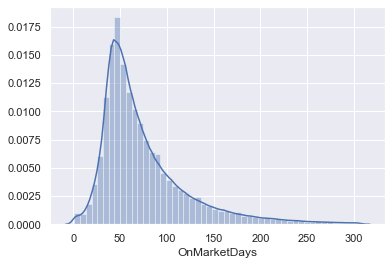

In [302]:
sns.distplot(LA)

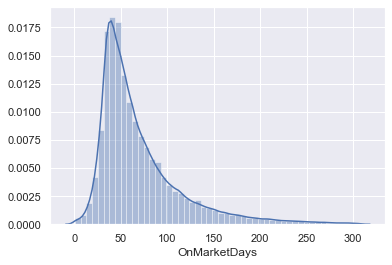

In [441]:
sns.distplot(SD)

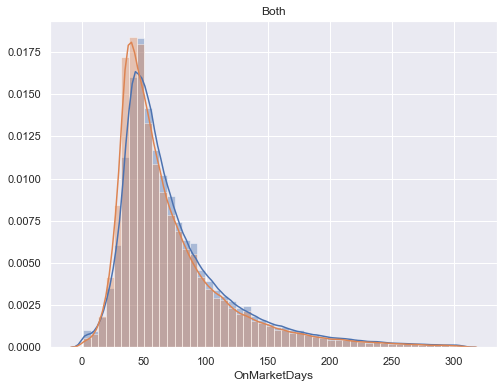

In [42]:
plt.figure(figsize = (8,6))
sns.distplot(df_LA.OnMarketDays)
sns.distplot(df_SD.OnMarketDays)
plt.title('Both')
sns.set(style = 'darkgrid')

## Solving the problem of the tails 

     - Using 99% quantile to identify the thousands that are shown above because they are extreme outliers
     
     - Using a conditional to elimnate extreme outliers (thousands of days and negative values)
     
     -Still allowing for keeping 99% of original data

In [18]:
#conditional only keep rows where value is less than 317

# tail_df = df.OnMarketDays.quantile(0.99)

In [19]:
# tail_df

In [20]:
# new_df.head()

In [21]:
# new_df = df[(df.OnMarketDays <= 317) & (df.OnMarketDays > 0)] 

In [22]:
# new_df

In [23]:
#conditional only keep rows where value is less than 317


# sns.distplot(new_df.OnMarketDays)

## Sampling

 - using bootstrapping to normalize for statistical testing.

In [442]:
type(LA_tom)

pandas.core.series.Series

In [130]:
rs = np.random.seed(2020)
LAlist = []
for i in range(0,200):
    LAlist.append(LA_tom.sample(1000, replace = True, random_state = rs).mean())

In [150]:
LADF = pd.DataFrame(LAlist)
LADF

,0
0,74.746
1,77.254
2,74.988
3,74.123
4,75.743
...,...
195,74.225
196,74.312
197,71.373
198,73.861


In [187]:
LADF.mean()

0    74.714335
dtype: float64

In [103]:
rs = np.random.seed(2020)
SDlist = []
for i in range(0,200):
    SDlist.append(SD_tom.sample(1000, replace = True, random_state = rs).mean())

In [152]:
SDDF = pd.DataFrame(SDlist)

In [419]:
SDDF.mean()

0    70.18952
dtype: float64

In [251]:
point_estimate = (LADF.mean() - SDDF.mean())
point_estimate.sum()

4.524815000000004

The mean days on market is about 4 more days in LA than San Diego

 - a better, more pythonic way to do it

In [ ]:
#    """ Returns the dataframe with only the variables of interest """
 #   rs = np.random.RandomState(seed=2020)
  #  means = [pd.DataFrame(df.sample(1000,replace=True,random_state=rs).mean()).T for i in range(n_times)]
   # return pd.concat(means) 
#def CLT_bootstrap(df, n_times=200, n_samples=1000):
#    """ Returns the dataframe with only the variables of interest """
 #   rs = np.random.RandomState(seed=2020)
  #  means = [pd.DataFrame(df.sample(1000,replace=True,random_state=rs).mean()).T for i in range(n_times)]
   # return pd.concat(means) 

## Testing for Normality 

In [443]:
scipy.stats.normaltest(LAlist)

NormaltestResult(statistic=1.1732099400468752, pvalue=0.5562124407528757)

In [137]:
scipy.stats.normaltest(SDlist)

NormaltestResult(statistic=1.9297841940653884, pvalue=0.38102431117506586)

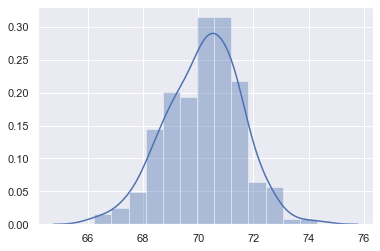

In [138]:
sns.distplot(SDlist)

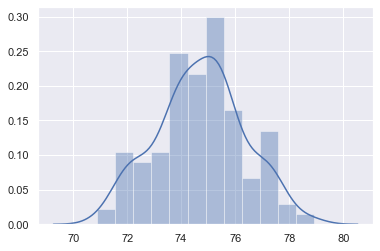

In [140]:
sns.distplot(LAlist)

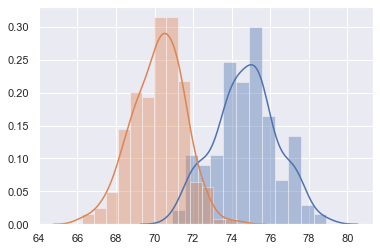

In [139]:
sns.distplot(LAlist)
sns.distplot(SDlist)

## Welch's Test
 - Welch's assumes normality, so I will test the normality because I didnt use CLT
 
The usefulness of the unequal variance t test

To interpret any P value, it is essential that the null hypothesis be carefully defined. For the unequal variance t test, the null hypothesis is that the two population means are the same but the two population variances may differ. If the P value is large, you don't reject that null hypothesis, so conclude that the evidence does not persuade you that the two population means are different, even though you assume the two populations have (or may have) different standard deviations. What a strange set of assumptions. What would it mean for two populations to have the same mean but different standard deviations? Why would you want to test for that? Swailowsky points out that this situation simply doesn't often come up in science (1). 

I think the unequal variance t test is more useful when you think about it as a way to create a confidence interval. Your prime goal is not to ask whether two populations differ, but to quantify how far apart the two means are. The unequal variance t test reports a confidence interval for the difference between two means that is usable even if the standard deviations differ.

In [253]:
scipy.stats.ttest_ind(LADF, SDDF, equal_var = False)

Ttest_indResult(statistic=array([30.35195372]), pvalue=array([3.95628357e-104]))

According to this test, we should reject the null. Our Pvalue indicates that the mean values are not the same. Next, we should find the signficance of difference in these means. 

## Confidence Interval

In [258]:
LADF.mean()

0    74.714335
dtype: float64

In [451]:
len(LADF)
LADF.std()

0    1.624022
dtype: float64

In [445]:
n = len(LADF)
LA_CI_lower = (LADF.mean()) - ((LADF.var())/math.sqrt(n))
LA_CI_lower

0    74.527839
dtype: float64

In [318]:
LA_CI_lower.values.sum()

74.52783929519981

In [322]:
LA_CI_upper = (LADF.mean()) + math.sqrt(((LADF.var())/n))

In [323]:
LA_CI_upper.values.sum()

74.82917069894697

In [446]:
print(LADF.mean().sum())

74.714335


In [ ]:
SD_CI_upper = (SDDF.mean()) + (SDDF.var()/sqrt(n))
SD_CI_upper.values.sum()

In [452]:
SD_CI_lower = (SDDF.mean()) - SDDF.var()

SD_CI_lower.values.sum()

68.38210487477387

In [480]:
def ConInt(sample, z_score):
    mean = sample.mean()
    variance = sample.var()
    n = len(sample)
    
    CI_upper = (mean + (z_score*(variance/math.sqrt(n))))
    CI_lower = (mean - (z_score*(variance/math.sqrt(n))))
    return CI_lower, CI_upper
                
    

In [481]:
ConInt(LADF, 2.58)

(0    74.233176
 dtype: float64, 0    75.195494
 dtype: float64)

## Plotting to see how it looks

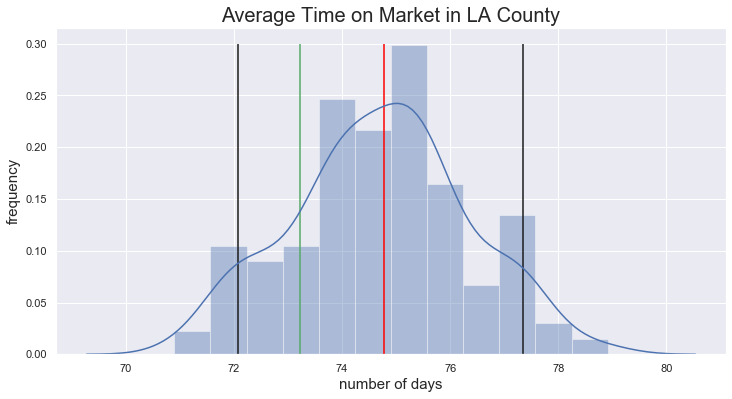

In [295]:
plt.figure(figsize=(12,6))
sns.distplot(LADF)
plt.vlines(x = LA_CI_upper, ymin = 0, ymax = 0.3)
plt.vlines(x = LA_CI_lower, ymin = 0, ymax = 0.3)
plt.vlines(x = tom_LA, ymin = 0, ymax = 0.3, color = 'red')
plt.title('Average Time on Market in LA County', fontdict = {'fontsize': 20})
plt.xlabel('number of days', fontdict = {'fontsize':15})
plt.ylabel('frequency', fontdict = {'fontsize':15})
plt.vlines(x = full_df.mean(), ymin = 0, ymax = 0.3, color = 'g')


#legend for lines


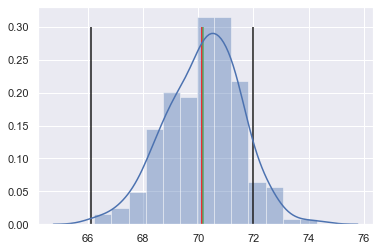

In [449]:
sns.distplot(SDDF)
plt.vlines(x = SD_CI_upper, ymin = 0, ymax = 0.3)
plt.vlines(x = CI_lower, ymin = 0, ymax = 0.3)
plt.vlines(x = tom_SD, ymin = 0, ymax = 0.3, color = 'red')
plt.vlines(x = SDDF.mean(), ymin=0, ymax=0.3, color ='g')


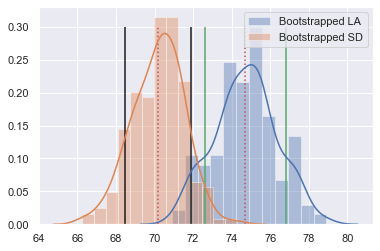

In [437]:
LA_upper_CI = (LADF.mean() + 2.58*LADF.std())

LA_lower_CI = (LADF.mean() - 2.58*LADF.std())

SD_upper_CI = (SDDF.mean() + 1.28*SDDF.std())

SD_lower_CI = (SDDF.mean() - 1.28*SDDF.std())

sns.distplot(LADF, label = 'Bootstrapped LA')
sns.distplot(SDDF, label = 'Bootstrapped SD')
plt.vlines(x = LA_upper_CI, ymin = 0, ymax = 0.3, color = 'g')
plt.vlines(x = LA_lower_CI, ymin = 0, ymax = 0.3, color = 'g')
# plt.vlines(x = tom_LA, ymin = 0, ymax = 0.3, color = 'red')

plt.vlines(x = SD_upper_CI, ymin = 0, ymax = 0.3)
plt.vlines(x = SD_lower_CI, ymin = 0, ymax = 0.3)
# # plt.vlines(x = tom_SD, ymin = 0, ymax = 0.3, color = 'g')

plt.vlines(x = SDDF.mean(), ymin = 0, ymax = 0.3, linestyles = 'dotted', color = 'r')
plt.vlines(x = LADF.mean(), ymin = 0, ymax = 0.3, color = 'r', linestyles = 'dotted')

# plt.vlines(x = full_df.mean(), ymin = 0, ymax = 0.3, color = 'g')



plt.legend()


In [144]:
# x_barLA = (statistics.mean(LA))

# LAstd = (statistics.stdev(LA, xbar = x_barLA))

# x_barSD = statistics.mean(SD)

# SDstd = (statistics.stdev(SD, xbar = x_barSD))

# print(LAstd)
# SDstd



# statistics.stdev(LA)

In [39]:
# x = LA.OnMarketDays
# fig,ax = plt.subplots(3,3,figsize=(9,9))
# res, norm_ = scipy.stats.probplot(x/1e3, dist='norm', fit=True, plot=ax[0,0])
# ax[0,0].set_title(f'Norm R={round(norm_[2],2)}')
# res, lognorm2_ = scipy.stats.probplot(x/1e3, dist='lognorm',sparams=(2,), fit=True, plot=ax[0,1])
# ax[0,1].set_title(f'LogNorm R={round(lognorm2_[2],2)}')
# res, lognorm2half_ = scipy.stats.probplot(x/1e3, dist='lognorm',sparams=(2.5,), fit=True, plot=ax[0,2])
# ax[0,2].set_title(f'LogNorm R={round(lognorm2half_[2],2)}')
# res, loggamma2_ = scipy.stats.probplot(x/1e3, dist='loggamma',sparams=(2,), fit=True, plot=ax[1,0])
# ax[1,0].set_title(f'LogGamma R={round(loggamma2_[2],2)}')
# res, loggamma_ = scipy.stats.probplot(x/1e3, dist='loggamma',sparams=(2,), fit=True, plot=ax[1,1])
# ax[1,1].set_title(f'LogGamma R={round(loggamma_[2],2)}')

## Measure effect size

 -- One aspect that is often neglected in the presentation of results is to actually quantify the difference or relationship, called the effect. It can be easy to forget that the intention of an experiment is to quantify an effect.
 
 Difference. Statistical methods for quantifying the difference between variables (e.g. difference between means).
 
 Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically signficant.
 

In [349]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (x.mean() - y.mean()) / math.sqrt(((nx-1)*(x).std() ** 2 + (ny-1)*y.std() ** 2) / dof)

In [351]:
cohen_d(LA, SD)

0.09957286290937759

In [352]:
cohen_d(LADF, SDDF)

0    3.035195
dtype: float64